# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

**Note:** Please load the data frame that was saved in Milestone 1 here before separating the data, and then proceed to the next step in Milestone 2.

### **Load the data**

In [692]:

### Libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


cars_data =  pd.read_pickle("cleaned.csv")

In [531]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

In [712]:
cars_data.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   5 non-null      object 
 1   Location               5 non-null      object 
 2   Year                   5 non-null      int64  
 3   Kilometers_Driven      5 non-null      int64  
 4   Fuel_Type              5 non-null      object 
 5   Transmission           5 non-null      object 
 6   Owner_Type             5 non-null      object 
 7   Mileage                5 non-null      float64
 8   Engine                 5 non-null      float64
 9   Power                  5 non-null      float64
 10  Seats                  5 non-null      float64
 11  New_price              5 non-null      float64
 12  Price                  5 non-null      float64
 13  kilometers_driven_log  5 non-null      float64
 14  Price_log              5 non-null      float64
 15  Brand     

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

Name has no predictive power so it wont add anything useful to the model. Price and price_log are the target/dependent variables so they have to be dropped from the independent features of the model. Kilometer Driven is dropped because we are using the log version of it instead in the model. 

In [296]:
# Step-1
X = cars_data.drop(['Name','Price','Price_log','Kilometers_Driven','Model'], axis = 1)

y = cars_data[["Price_log", "Price"]]

In [297]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [298]:
X.head()

,Year,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo
0,2010,26.60,998.0,58.16,5.0,11.57,11.184421,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,11.57,10.621327,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199.0,88.70,5.0,8.61,10.736397,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248.0,88.76,7.0,11.57,11.373663,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968.0,140.80,5.0,11.57,10.613246,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [299]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4212, 54) (1806, 54)


In [660]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>
**5) XGBOOST Regressor** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [261]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [277]:
# Create a linear regression model
lr = LinearRegression()

In [300]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

LinearRegression()

**Observations from results: _____**

In [416]:
# Get score of the model
import sklearn.metrics as metrics
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8613777097881481
R-square on test set :  0.8608090913675667
RMSE on training set :  4.159755484588032
RMSE on test set :  4.15800370746179


The variability of the model is well explained and the model also performs well on the test data. The model also has a relatively low RMSE which is good.

**Important variables of Linear Regression**

Building a model using statsmodels.

In [302]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     907.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:55:34   Log-Likelihood:                -29.109
No. Observations:                4212   AIC:                             168.2
Df Residuals:                    4157   BIC:                             517.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## There is need to check which variables to keep and which to get rid off in other to remove multicollinearity so I'll check the VIF(Variance Inflator Factor) value for every column

In [315]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        843237.305462
Year                              2.212090
Mileage                           3.151872
Engine                           10.255012
Power                             9.507240
Seats                             2.414726
New_price                         1.234024
kilometers_driven_log             1.786289
Location_Bangalore                2.366791
Location_Chennai                  2.816680
Location_Coimbatore               3.446043
Location_Delhi                    3.024497
Location_Hyderabad                3.700685
Location_Jaipur                   2.576494
Location_Kochi                    3.429236
Location_Kolkata                  3.030132
Location_Mumbai                   3.904413
Location_Pune                     3.263835
Fuel_Type_Diesel                 29.219615
Fuel_Type_Electric                1.035794
Fuel_Type_LPG                     1.204179
Fuel_Type_Petrol                 30.217426
Transmission_Manual               2.2343

In [323]:
train_features_new = x_train.drop("Brand_maruti", axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_new.values, i) for i in range(train_features_new.shape[1])],
    index=train_features_new.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))


VIF Scores: 

const                        841074.322378
Year                              2.211233
Mileage                           3.147667
Engine                           10.247554
Power                             9.488715
Seats                             2.413078
New_price                         1.233679
kilometers_driven_log             1.785218
Location_Bangalore                2.366783
Location_Chennai                  2.815105
Location_Coimbatore               3.445927
Location_Delhi                    3.024470
Location_Hyderabad                3.700663
Location_Jaipur                   2.576384
Location_Kochi                    3.429128
Location_Kolkata                  3.030131
Location_Mumbai                   3.904412
Location_Pune                     3.263764
Fuel_Type_Diesel                 29.217789
Fuel_Type_Electric                1.035793
Fuel_Type_LPG                     1.204173
Fuel_Type_Petrol                 30.216808
Transmission_Manual               2.2343

In [327]:
train_features_new3 = train_features_new2.drop("Engine", axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_new3.values, i) for i in range(train_features_new3.shape[1])],
    index=train_features_new3.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        837843.800480
Year                              2.203591
Mileage                           2.752590
Power                             3.851377
Seats                             2.250476
New_price                         1.215466
kilometers_driven_log             1.777120
Location_Bangalore                2.366611
Location_Chennai                  2.814510
Location_Coimbatore               3.443608
Location_Delhi                    3.024308
Location_Hyderabad                3.697811
Location_Jaipur                   2.573688
Location_Kochi                    3.428489
Location_Kolkata                  3.028274
Location_Mumbai                   3.902945
Location_Pune                     3.262991
Fuel_Type_Diesel                  2.065280
Fuel_Type_Electric                1.009773
Fuel_Type_LPG                     1.011550
Transmission_Manual               2.234009
Owner_Type_Fourth & Above         1.013159
Owner_Type_Second                 1.1827

- Firstly I removed the Brand_Maruti because it had a VIF of 688.97
- secondly I removed Fuel_Type_Petrol as it had a VIF of 30.2
- thirdly I removed Engine and now everything looks good as there is no VIF above or equal to 5.

<AxesSubplot:xlabel='Price_log', ylabel='Count'>

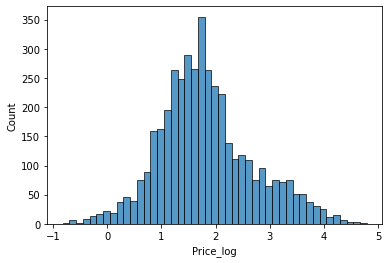

In [328]:
sns.histplot(data=y_train["Price_log"])

- The target variable is normally distributed.

In [ ]:
train_features_new3= train_features_new3.drop('Brand_bentley', axis=1)

In [408]:
olsmodel_2= sm.OLS(y_train["Price_log"],train_features_new3)
ols_res_2= olsmodel_2.fit()

In [409]:
olsmodel_2 = build_ols_model(x_train)
ols_res_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1169.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:01:28   Log-Likelihood:                -77.216
No. Observations:                4212   AIC:                             238.4
Df Residuals:                    4170   BIC:                             505.0
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -238.8419      3.461    -69.004      0.000    -245.628    -232.056
Year                      0.1194      0.002     69.940      0.000       0.116       0.123
Mileage                  -0.0155      0.001    -11.829      0.000      -0.018      -0.013
Power                     0.0063      0.000     46.768      0.000       0.006       0.007
Seats                     0.0623      0.007      9.002      0.000       0.049       0.076
New_price                -0.0009      0.000     -2.140      0.032      -0.002   -7.32e-05
kilometers_driven_log    -0.0606      0.007     -8.500      0.000      -0.075      -0.047
Location_Bangalore        0.1561      0.020      8.003      0.000       0.118       0.194
Location_Coimbatore       0.0932      0.017      5.599      0.000       0.061       0.126
Location_Delhi           -0.0643      0.017     -3.762      0.000      -0.098      -0.031
Location_Hyderabad        0.0988      0.016      6.307      0.000       0.068       0.130
Location_Jaipur          -0.0795      0.019     -4.295      0.000      -0.116      -0.043
Location_Kochi           -0.0395      0.017     -2.361      0.018      -0.072      -0.007
Location_Kolkata         -0.2481      0.017    -14.242      0.000      -0.282      -0.214
Location_Mumbai          -0.0474      0.016     -3.012      0.003      -0.078      -0.017
Location_Pune            -0.0478      0.016     -2.903      0.004      -0.080      -0.016
Fuel_Type_Diesel          0.3131      0.011     29.220      0.000       0.292       0.334
Fuel_Type_Electric        1.1832      0.249      4.754      0.000       0.695       1.671
Transmission_Manual      -0.1166      0.013     -9.201      0.000      -0.141      -0.092
Owner_Type_Second        -0.0569      0.011     -5.088      0.000      -0.079      -0.035
Owner_Type_Third         -0.1265      0.029     -4.408      0.000      -0.183      -0.070
Brand_audi                0.6185      0.026     24.247      0.000       0.569       0.669
Brand_bmw                 0.5830      0.025     23.005      0.000       0.533       0.633
Brand_chevrolet          -0.2983      0.028    -10.843      0.000      -0.352      -0.244
Brand_datsun             -0.4879      0.083     -5.860      0.000      -0.651      -0.325
Brand_fiat               -0.2971      0.057     -5.177      0.000      -0.410      -0.185
Brand_ford               -0.0350      0.018     -1.907      0.057      -0.071       0.001
Brand_honda               0.0795      0.014      5.741      0.000       0.052       0.107
Brand_jaguar              0.6008      0.051     11.776      0.000       0.501       0.701
Brand_jeep                0.2005      0.076      2.626      0.009       0.051       0.350
Brand_lamborghini         0.6977      0.258      2.706      0.007       0.192       1.203
Brand_land             

In [418]:
print(ols_res_2.rsquared)

0.919954875265152


- the p value indicates whether that particular column and the target variable have a linear relationship or not(wards test of linearity 
- if it is less than 0.05 then it has a relationship
- Brand_volkswagen was removed
-  'Brand_hyundai',Fuel_Type_LPG,Brand_smart,Owner_Type_FourthAbove,Brand_isuzu,Location_Chennai,Brand_force,Brand_bentley  was also removed

- removing all these columns had no impact on the r sqaured and adjusted r squared which shows they are insignificant.

- The R-squared value for the OLS Linear Regression model is ~0.91, which indicates that the model is able to explain about 90% variance in the target variable.

In [412]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(ols_res_2.params, columns = ['coef'])

olsmod['pval'] = ols_res_2.pvalues

In [413]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
New_price,-0.000872,3.240490e-02
Brand_renault,-0.058280,2.074402e-02
Location_Kochi,-0.039519,1.828461e-02
Brand_jeep,0.200457,8.659938e-03
Brand_lamborghini,0.697730,6.842808e-03
Location_Pune,-0.047801,3.711142e-03
Location_Mumbai,-0.047360,2.609312e-03
Location_Delhi,-0.064277,1.708082e-04
Location_Jaipur,-0.079459,1.787205e-05
Brand_mahindra,-0.100744,1.657022e-05


In [414]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in mp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['New_price', 'Brand', 'Location', 'Owner_Type', 'Fuel_Type', 'kilometers_driven_log', 'Seats', 'Transmission', 'Mileage', 'Year', 'Power']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [417]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [755]:
# Create a Ridge regression model
clf = Ridge(alpha=0.01)

In [756]:
# Fit Ridge regression model
clf.fit(X_train, y_train['Price_log']) 

Ridge(alpha=0.01)

In [757]:
# Get score of the model
import sklearn.metrics as metrics
R_score = get_model_score(clf)

R-sqaure on training set :  0.8613408644637992
R-square on test set :  0.8607911653260899
RMSE on training set :  4.160308272154396
RMSE on test set :  4.158271448178352


**Observations from results: _____**

- The error rates and r squared are  quite similar to Linear regression but the OLS linear regression has better variability. We will try some new models to see which works best. 

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [427]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [801]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state = 1)

In [802]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(random_state=1)

In [803]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999965696959587
R-square on test set :  0.8274841319713868
RMSE on training set :  0.020692719736775493
RMSE on test set :  4.6290722700329265


In [804]:
accuracy_dt=dtree.score(X_train,y_train['Price_log'])
accuracy_dt

0.9999903038539666

**Observations from results: _____**
- the model is almost perfect on the training data and doesn't perform so well on the test data which indicates that there is overfitting using a Decision tree which probably meanse it is too complex and a simpler model should be used

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [707]:

imp_feat= (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False))
imp_feat

,Imp
Power,6.111821e-01
Year,2.312773e-01
Engine,4.592465e-02
Mileage,1.999366e-02
kilometers_driven_log,1.628961e-02
Brand_tata,5.476441e-03
New_price,5.451819e-03
Location_Kolkata,4.536987e-03
Brand_honda,4.425015e-03
Transmission_Manual,4.388658e-03


**Observations and insights: _____**

The most important features that influence the target variable according to the Decision tree are Power, Year and Engine

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [432]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [554]:
# Create a Randomforest regression model 
regr = RandomForestRegressor()

In [555]:
# Fit Randomforest regression model
regr.fit(X_train, y_train['Price_log'])

RandomForestRegressor()

In [454]:
# Get score of the model
regr_model = get_model_score(regr)

R-sqaure on training set :  0.9764790508160264
R-square on test set :  0.8555826169552051
RMSE on training set :  1.7134786205823105
RMSE on test set :  4.235348707622516


In [556]:
accuracy_rf=regr.score(X_train,y_train['Price_log'])
accuracy_rf

0.9902328529697196

**Observations and insights: _____**
Performs better on test data than Decision tree model and also has a lower error but there seems to be overfitting. 

**Feature Importance**

In [706]:
# Print important features similar to decision trees
imp_feat= (pd.DataFrame(regr.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False))

imp_feat

,Imp
Power,0.617653
Year,0.230386
Engine,0.037251
kilometers_driven_log,0.018600
Mileage,0.016618
New_price,0.006290
Brand_land,0.005414
Location_Kolkata,0.005205
Brand_tata,0.005165
Transmission_Manual,0.004389


**Observations and insights: _____**
- just like the decision tree, the most important features using the random forest algorithm are power, year and engine

### **Hyperparameter Tuning: Decision Tree**

In [557]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split


In [ ]:
# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1, n_jobs=-1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8,10,12,14],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              "max_features": ["sqrt","auto"]
               "criterion" : ["squared_error","friedman_mse","absolute_error"]
            
             }



In [807]:
# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, cv=10)
grid_obj.fit(X_train, y_train['Price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

print("Best Hyperparameters::\n{}".format(grid_obj.best_params_))

Best Hyperparameters::
{'criterion': 'squared_error', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [567]:
# Fit the best algorithm to the data
dtree_tuned = DecisionTreeRegressor(criterion="squared_error",random_state=0,max_depth= 12, 
                                    max_leaf_nodes= 100, max_features="auto",
                                    min_samples_leaf= 20, min_samples_split= 10)


dtree_tuned.fit(X_train, y_train['Price_log'])


DecisionTreeRegressor(max_depth=12, max_features='auto', max_leaf_nodes=100,
                      min_samples_leaf=20, min_samples_split=10,
                      random_state=0)

In [571]:
# Get score of the dtree_tuned
Dtree_model = get_model_score(dtree_tuned)


R-sqaure on training set :  0.8360649180445646
R-square on test set :  0.7910204039477415
RMSE on training set :  4.523631496655098
RMSE on test set :  5.09484973856102


In [573]:
accuracy_grid_cv_dtm=dtree_tuned.score(X_train,y_train['Price_log'])
accuracy_grid_cv_dtm

0.8990076914945273

**Observations and insights: _____**
- the model no longer overfits on the data after hyperparameter tuning. 

**Feature Importance**

In [705]:
# Print important features of tuned decision tree similar to decision trees
imp_feat= (pd.DataFrame(grid_obj.best_estimator_.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False))
imp_feat

,Imp
Power,0.667953
Year,0.248744
Engine,0.044981
Mileage,0.010684
Transmission_Manual,0.006464
kilometers_driven_log,0.004657
Brand_tata,0.004070
Fuel_Type_Petrol,0.003752
Location_Kolkata,0.002040
Brand_mercedes-benz,0.002011


**Observations and insights: _____**
- `power , year and engine still remain the most important features after hyperparameter tuning

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Choose the type of Regressor
"Random Forest Regressor"

regr = RandomForestRegressor()
# Define the parameters for Grid to choose from 
parameters = {
            'n_estimators': [50,100,150,200,250,300],
            'max_depth': [1,3,5,7,9,11,13,15,17,19,None],
            'bootstrap': [True, False],
            "min_samples_split": [10, 20, 40],
            "min_samples_leaf": [20, 40, 100],
}


In [521]:
# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations

# Run the grid search
clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train['Price_log'])
print("Best Hyperparameters::\n{}".format(clf.best_params_))

Best Hyperparameters::
{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [522]:
# Set the model to the best combination of parameters
reggr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=15,
                              bootstrap=True, min_samples_leaf=20,min_samples_split=10)

reggr.fit(X_train, y_train['Price_log'])
# Fit the best algorithm to the data

RandomForestRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=10,
                      n_estimators=200, random_state=0)

In [523]:
# Get score of the model
model = get_model_score(reggr)

R-sqaure on training set :  0.8482685612283297
R-square on test set :  0.8101481242052181
RMSE on training set :  4.352001698525755
RMSE on test set :  4.856091748824415


In [549]:
accuracy_grid_cv_rfm=reggr.score(X_train,y_train['Price_log'])
accuracy_grid_cv_rfm

0.9043615227868786

**Observations and insights: _____**
- hypertuning the parameters got rid of the overfitting. there is less error using the hypertuned random Forest compared to the hypertuned Decision tree.

**Feature Importance**

In [704]:
# Print important features of tuned decision tree similar to decision trees
im_feature= pd.DataFrame(reggr.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False)
                                                        
im_feature


,Imp
Power,0.681892
Year,0.249748
Engine,0.034064
Mileage,0.008867
kilometers_driven_log,0.007679
Transmission_Manual,0.006239
Fuel_Type_Petrol,0.001935
Location_Kolkata,0.001873
Fuel_Type_Diesel,0.001691
Brand_mahindra,0.001637


**Observations and insights: ______**

- Power, year and engine are still the most important features but on the hypertuned Random Forest, Mileage comes before Kilometers driven where as on the Random Forest Kilometers Driven is off higher importance. 

- New Price is also of less importance in the hypertuned Random Forest 

### **XGBOOST Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [539]:
parameters = {
                "loss": ['squared_error', 'absolute_error','huber'],
                "learning_rate":[0.1,0.01,0.3],
                "n_estimators":[200,300,400,450],
                "max_depth": [3,4,5,6,7]
                
    }
Gbr= GradientBoostingRegressor()
grid_cv_gbr = GridSearchCV(Gbr, parameters, cv=5)
grid_cv_gbr.fit(X_train, y_train['Price_log'])
print("Best Hyperparameters::\n{}".format(grid_cv_gbr.best_params_))

Best Hyperparameters::
{'learning_rate': 0.3, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 450}


In [545]:
Gbr= GradientBoostingRegressor(learning_rate=0.3, loss="squared_error", max_depth=3, n_estimators=450)


Gbr.fit(X_train, y_train['Price_log'])

GradientBoostingRegressor(learning_rate=0.3, n_estimators=450)

In [546]:
model= get_model_score(Gbr)

R-sqaure on training set :  0.9888664923466743
R-square on test set :  0.9085246444539786
RMSE on training set :  1.1788736871188903
RMSE on test set :  3.3707883974219315


In [606]:
accuracy_grid_cv_dtm=Gbr.score(X_train,y_train['Price_log'])
accuracy_grid_cv_dtm

0.9868413987460704

In [703]:
im_feature= pd.DataFrame(Gbr.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False)
                                                        
im_feature

,Imp
Power,0.473098
Year,0.233097
Engine,0.143782
Transmission_Manual,0.042903
kilometers_driven_log,0.014030
Fuel_Type_Diesel,0.013524
Brand_tata,0.009916
Mileage,0.008443
Brand_land,0.007312
Location_Kolkata,0.005869


 Power, year and engine are the most impactful features in the model.

In [816]:
# Defining list of models you have trained
models = [lr,clf,dtree,regr,dtree_tuned,reggr, Gbr]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])
    
   


In [817]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge', 'Decision Tree', 
                                          'Random Forest','Decision Tree Grid_Cv',
                                          'Random Forest Grid_Cv', 'XGBOOST Regressor'], 
                                 
                                          'Train_r2': r2_train,
                                          'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,
                                          'Test_RMSE': rmse_test
                                }
                               ) 
comparison_frame= comparison_frame.set_index('Model')
comparison_frame

,Train_r2,Test_r2,Train_RMSE,Test_RMSE
Model,,,,
Linear Regression,0.861378,0.860809,4.159755,4.158004
Ridge,0.861341,0.860791,4.160308,4.158271
Decision Tree,0.999997,0.827484,0.020693,4.629072
Random Forest,0.974964,0.857122,1.767817,4.212711
Decision Tree Grid_Cv,0.836065,0.791020,4.523631,5.094850
Random Forest Grid_Cv,0.848269,0.810148,4.352002,4.856092
XGBOOST Regressor,0.988866,0.908525,1.178874,3.370788


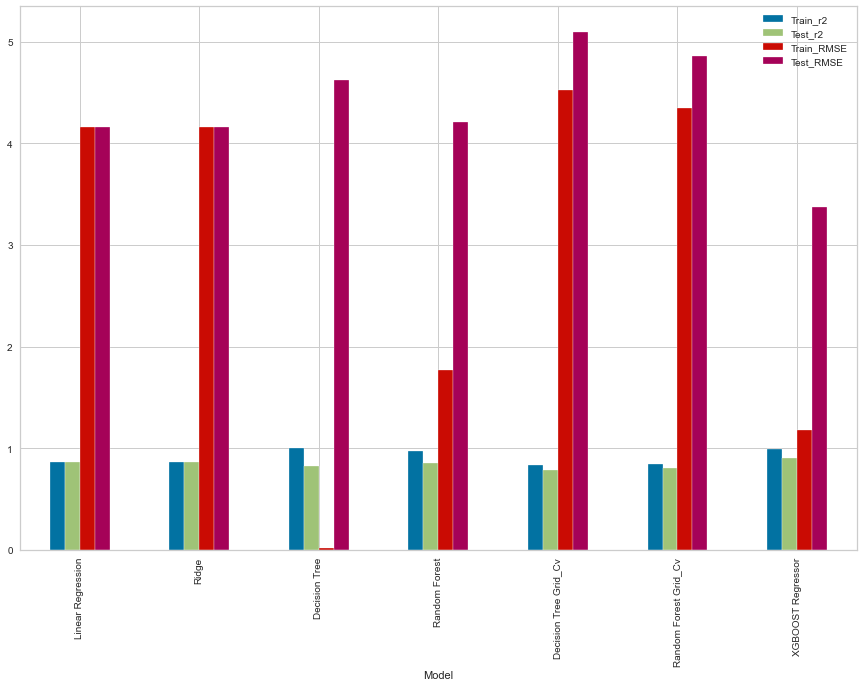

In [800]:


comparison_frame.plot.bar(figsize= (15,10));


**Observations: _____**
- the XGboost regressor performs better than the other algorithms and has the least error on the test data.
- Random forest performs better than the decision tree even after hyperparameter tuning 
- Linear regression performed better than Ridge. 

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
    - Some of the most meaningful insights gotten from the data which are relevant to the problem are the feature importance. Each built model is able to provide us with the order of feature importance which lets us know which features influnced the price_log variable the most.
    - Power, year and engine are the most important factors in determining the price of a used car.
    - Most of the cars transmission are manual but the most costly cars are automatic
    - cars which have been sold just once in the past fetch the most money. The more the number of owners , the less the value of the car.
    - It is not clear why but cars with Diesel as their fuel type are sold the most. in second place is petrol. This means your car will fetch a higher amount if it has one of these fuel types. 
    - The higher the Power of a car, the higher the price

**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
    - Decision tree and random forest overfit the data but after hypertuning the models using grid search cv, both      perfomed relatively better. Linear regression outperformed the regularization technique Ridge.
    - The coefficient of the determinant r squared , which is the variance in the target variable that is predictable from the independent variables tells us that the data bests fits the XGBOOST Regressor model. This model also has the lowest Root Mean Squared Error.
    - perhaps further tuning of the parameters trying different range of values might produce sightly better results or even designing deep learning network structures

**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
    - The proposed model for my final solution will be the XGBoost Regressor
    - the variance in the target variable that is predictable from the independent variables tells us that the data bests fits the XGBOOST Regressor model. This model also has the lowest Root Mean Squared Error.
    - The first three features that influences the result the most are the same as the Random Forest Regressor and Decision Tree Regressor but the fourth onwards are different. I believe this is one of the reasons why this Model has better results.